# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Funktionen

In [2]:
def plot_scatter(c1: np.ndarray, c2: np.ndarray, c1_label: str, c2_label: str):
    plt.scatter(c1[:, 0], c1[:, 1], label=c1_label)
    plt.scatter(c2[:, 0], c2[:, 1], label=c2_label)
    plt.legend()
    plt.show()

def generate_dataset(c1: np.ndarray, c2: np.ndarray, test_size: float = 0.3):
    x = np.concatenate([c1, c2], axis=0)
    y = np.concatenate([np.zeros(c1.shape[0]), np.ones(c2.shape[0])], axis=0)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    return x, y, x_train, x_test, y_train, y_test

# Aufgabe 2



## 1. Datensatz: Unimodal teilweise überlappend

### Daten erzeugen und plotten

Size Training Data Set 1: 1400
Size Test Data Set 1: 600


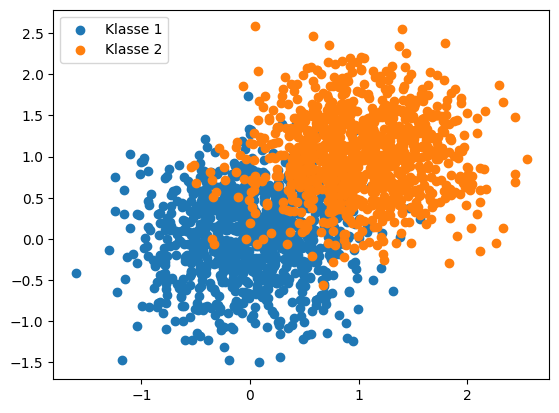

In [3]:
mean1 = [0, 0]
mean2 = [1, 1]
std = 0.5
n = 1000

c1 = np.random.normal(mean1, std, size=(n, 2))
c2 = np.random.normal(mean2, std, size=(n, 2))

x_set1, y_set1, x_train_set1, x_test_set1, y_train_set1, y_test_set1 = generate_dataset(c1=c1, c2=c2, test_size=0.3)

print(f'Size Training Data Set 1: {x_train_set1.shape[0]}')
print(f'Size Test Data Set 1: {x_test_set1.shape[0]}')

plot_scatter(c1=c1, c2=c2, c1_label='Klasse 1', c2_label='Klasse 2')

### Quadratischer Polynom-Klassifikator

TODO

### Fehlerwahrscheinlichkeit $ P_F $

TODO

## 2. Datensatz: Eine nicht unimodal verteilte Klasse

### Daten erzeugen und plotten

Size Training Data Set 2: 1400
Size Test Data Set 2: 600


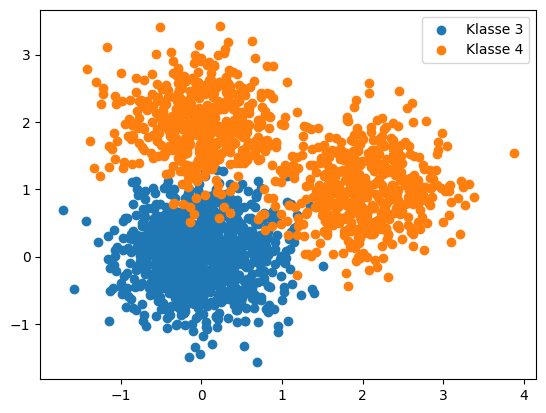

In [4]:
mean3 = [0, 0]

mean4_1 = [2, 1]
mean4_2 = [0, 2]

std = 0.5
n = 1000

c3 = np.random.normal(mean3, std, size=(n, 2))
class4_1 = np.random.normal(mean4_1, std, size=(int(n/2), 2))
class4_2 = np.random.normal(mean4_2, std, size=(int(n/2), 2))

c4 = np.concatenate([class4_1, class4_2], axis=0)

x_set2, y_set2, x_train_set2, x_test_set2, y_train_set2, y_test_set2 = generate_dataset(c1=c3, c2=c4, test_size=0.3)

print(f'Size Training Data Set 2: {x_train_set2.shape[0]}')
print(f'Size Test Data Set 2: {x_test_set2.shape[0]}')

plot_scatter(c1=c3, c2=c4, c1_label='Klasse 3', c2_label='Klasse 4')


### Quadratischer Polynom-Klassifikator

TODO

### Fehlerwahrscheinlichkeit $ P_F $

TODO

# Aufgabe 3

## 1. Datensatz: Unimodal teilweise überlappend

### Logistische Regression

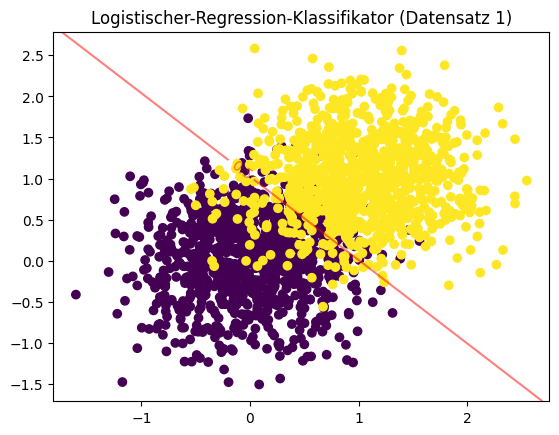

In [5]:
clf1 = LogisticRegression()
clf1.fit(x_train_set1, y_train_set1)

plt.figure()
plt.scatter(x_set1[:, 0], x_set1[:, 1], c=y_set1)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf1.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 1)')
plt.show()

### Fehlerwahrscheinlichkeit $ P_F $

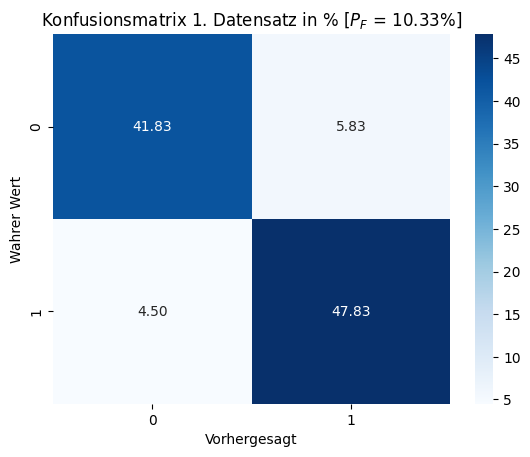

In [6]:
y_pred1 = clf1.predict(x_test_set1)

# 1. Datensatz
cm1 = confusion_matrix(y_test_set1, y_pred1)
cm_perc1 = cm1 / cm1.sum() * 100
sns.heatmap(cm_perc1, annot=True, fmt='.2f', cmap='Blues')
pf1 = (cm1[0, 1] + cm1[1, 0]) / cm1.sum() * 100
plt.xlabel('Vorhergesagt')
plt.ylabel('Wahrer Wert')
plt.title(fr'Konfusionsmatrix 1. Datensatz in % [$P_F$ = {pf1:.2f}%]')
plt.show()

### Logistische Regression mit quadratisch nichlinearer Transformation

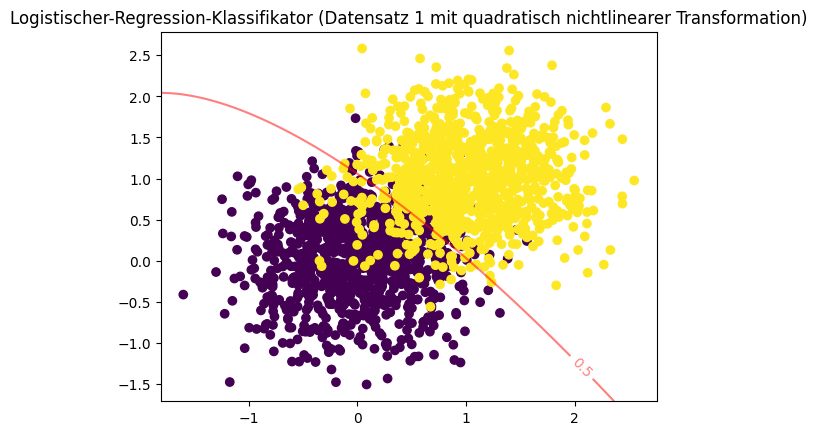

In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_set1_transformed = poly.fit_transform(np.vstack([c1, c2]))

x_train_set1, x_test_set1, y_train_set1, y_test_set1 = train_test_split(x_set1_transformed, y_set1, test_size=0.3)

clf1 = LogisticRegression()
clf1.fit(x_train_set1, y_train_set1)

plt.figure()
plt.scatter(x_set1_transformed[:, 0], x_set1_transformed[:, 1], c=y_set1)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
xy_transformed = poly.transform(xy)
Z = clf1.predict_proba(xy_transformed)[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 1 mit quadratisch nichtlinearer Transformation)')
plt.show()

### Fehlerwahrscheinlichkeit $P_F$

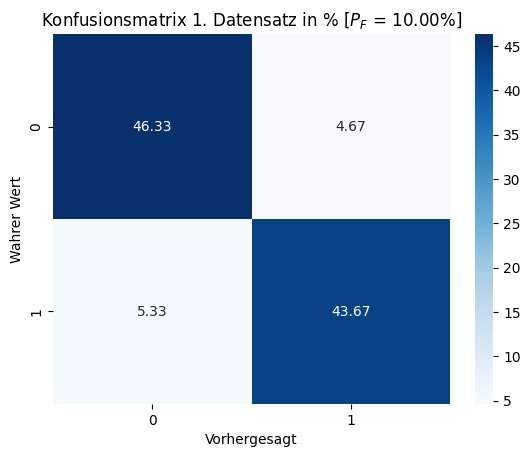

In [8]:
y_pred_set1 = clf1.predict(x_test_set1)
cm1 = confusion_matrix(y_test_set1, y_pred_set1)
cm_perc1 = cm1 / cm1.sum() * 100
pf1 = (cm1[0, 1] + cm1[1, 0]) / cm1.sum() * 100

sns.heatmap(cm_perc1, annot=True, fmt='.2f', cmap='Blues')
pf1 = (cm1[0, 1] + cm1[1, 0]) / cm1.sum() * 100
plt.xlabel('Vorhergesagt')
plt.ylabel('Wahrer Wert')
plt.title(fr'Konfusionsmatrix 1. Datensatz in % [$P_F$ = {pf1:.2f}%]')
plt.show()

## 2. Datensatz: Eine nicht unimodal verteilte Klasse

### Logistische Regression

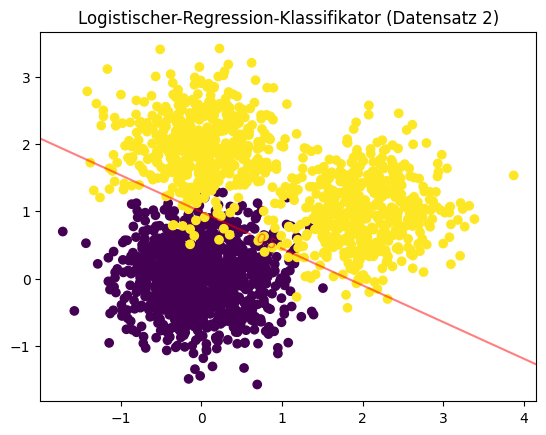

In [9]:
clf2 = LogisticRegression()
clf2.fit(x_train_set2, y_train_set2)

plt.figure()
plt.scatter(x_set2[:, 0], x_set2[:, 1], c=y_set2)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 2)')
plt.show()

### Fehlerwahrscheinlichkeit $ P_F $

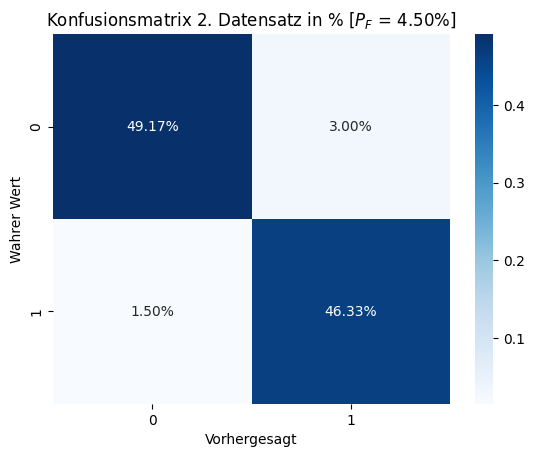

In [10]:
y_pred2 = clf2.predict(x_test_set2)

cm2 = confusion_matrix(y_test_set2, y_pred2)
cm_perc2 = cm2 / cm2.sum()

sns.heatmap(cm_perc2, annot=True, fmt='.2%', cmap='Blues')
pf2 = (cm2[0, 1] + cm2[1, 0]) / cm2.sum() * 100
plt.xlabel('Vorhergesagt')
plt.ylabel('Wahrer Wert')
plt.title(fr'Konfusionsmatrix 2. Datensatz in % [$P_F$ = {pf2:.2f}%]')
plt.show()

### Logistische Regression mit quadratisch nichlinearer Transformation

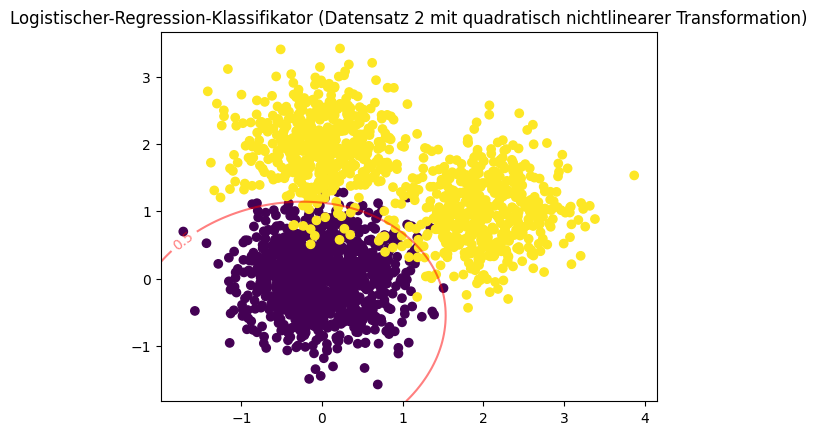

In [11]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_set2_transformed = poly.fit_transform(np.vstack([c3, c4]))

x_train_set2, x_test_set2, y_train_set2, y_test_set2 = train_test_split(x_set2_transformed, y_set2, test_size=0.3)

clf2 = LogisticRegression()
clf2.fit(x_train_set2, y_train_set2)

plt.figure()
plt.scatter(x_set2_transformed[:, 0], x_set2_transformed[:, 1], c=y_set2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
xy_transformed = poly.transform(xy)
Z = clf2.predict_proba(xy_transformed)[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 2 mit quadratisch nichtlinearer Transformation)')
plt.show()

### Fehlerwahrscheinlihckeit $P_F$

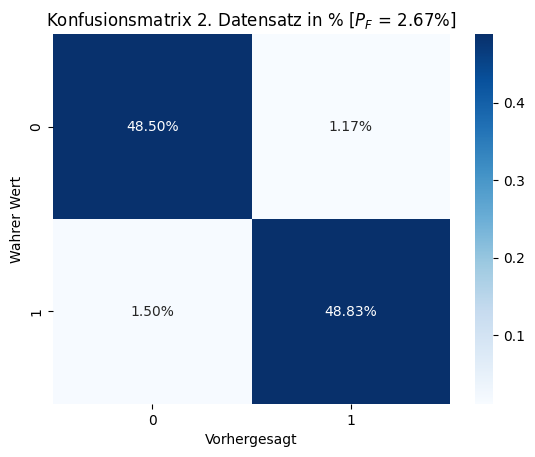

In [12]:
y_pred_set2 = clf2.predict(x_test_set2)
cm2 = confusion_matrix(y_test_set2, y_pred_set2)
cm_perc2 = cm2 / cm2.sum()

pf2 = (cm2[0, 1] + cm2[1, 0]) / cm2.sum() * 100

sns.heatmap(cm_perc2, annot=True, fmt='.2%', cmap='Blues')

plt.xlabel('Vorhergesagt')
plt.ylabel('Wahrer Wert')
plt.title(fr'Konfusionsmatrix 2. Datensatz in % [$P_F$ = {pf2:.2f}%]')
plt.show()

## Wie werden die Parameter über eine Optimierung bestimmt?

Die Parameter einer logistischen Regression werden über eine Optimierung bestimmt, indem die negativ logarithmierte Likelihood-Funktion numerisch minimiert wird.

Dies geschieht in der Regel mit Hilfe von Optimierungsalgorithmen, die den Gradienten der Funktion nutzen, um die Richtung der Parameteraktualisierung zu bestimmen. Ein weit verbreiteter Algorithmus ist zum Beispiel der Gradientenabstieg. Dabei wird ein Anfangswert für die Parameter festgelegt und iterativ so angepasst, dass die negativ logarithmierte Likelihood-Funktion minimiert wird. Die Iterationen werden fortgesetzt, bis ein Abbruchkriterium erreicht ist oder eine vorgegebene Anzahl von Iterationen durchgeführt wurde.

Ziel ist es, die Parameter so zu bestimmen, dass die Wahrscheinlichkeit, die beobachteten Daten zu erklären, maximiert wird. Dies bedeutet, dass das Modell in der Lage ist, die Beziehung zwischen den Eingangsdaten und den Zielvariablen so gut wie möglich zu modellieren und damit eine Vorhersage für neue, unbekannte Datenpunkte machen kann.